In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import PIL
from io import BytesIO
from IPython.display import clear_output, Image as NoteImage, display

In [2]:
%matplotlib notebook
def imshow(im,fmt='jpeg'):
    #a = np.uint8(np.clip(im, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(im).save(f, fmt)
    display(NoteImage(data=f.getvalue()))
def imread(filename):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

In [3]:
data=pd.read_csv("Fall 2019 Plumes detected by AVIRIS-NG and GAO provided by NASA-JPL and U.Arizona.csv")
data

,source_id,plume_lat,plume_lon,plume_candidate_id,date_of_detection,time_of_detection,source_type,source_type_label,ipcc,qplume,sigma_qplume,active_flare,inactive_flare,Operator_Alias,imageurl
0,P00156,32.283447,-103.741815,ang20190922t192642-A,9/23/2019,7:26:42 PM,compressor,Midstream,1B2 Oil & Natural Gas,296.676732,98.755811,False,False,DCP MIDSTREAM PARTNERS,https://edf-permian-data.s3.amazonaws.com/imag...
1,P00119,32.244361,-103.711379,ang20190922t192642-B,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,640.968143,190.138173,False,False,DEVON ENERGY PRODUCTION CO,https://edf-permian-data.s3.amazonaws.com/imag...
2,P00475,32.166625,-103.685468,ang20190922t194340-A,9/23/2019,7:43:40 PM,tank,Production,1B2 Oil & Natural Gas,1091.242729,310.028504,False,False,DEVON ENERGY PRODUCTION CO,https://edf-permian-data.s3.amazonaws.com/imag...
3,P00002,32.200072,-103.673301,ang20190922t192642-4,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,420.725207,147.155782,False,False,ENLINK,https://edf-permian-data.s3.amazonaws.com/imag...
4,P00003,32.116008,-103.626345,ang20190922t192642-5,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,1051.909600,339.267587,False,False,EOG RESOURCES INC,https://edf-permian-data.s3.amazonaws.com/imag...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,P01769,31.478768,-102.958800,GAO20191103t163539p0000-C,11/4/2019,4:35:39 PM,compressor,Midstream,1B2 Oil & Natural Gas,159.291858,64.873698,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...
3063,P01784,32.793745,-104.123650,GAO20191103t181042p0000-A,11/4/2019,6:10:42 PM,pipeline,Midstream,1B2 Oil & Natural Gas,250.722494,51.888206,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...
3064,P01784,32.793674,-104.123290,GAO20191103t182306p0000-B,11/4/2019,6:23:06 PM,pipeline,Midstream,1B2 Oil & Natural Gas,298.184474,68.096895,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...
3065,P01786,32.795682,-104.163570,GAO20191103t182306p0000-C,11/4/2019,6:23:06 PM,pipeline,Midstream,1B2 Oil & Natural Gas,200.567906,36.274204,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...


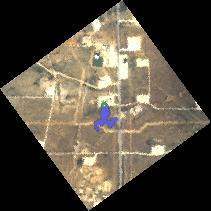

(211, 211, 3)


In [4]:
img=imread("ang20190922t192642-A.png")
#img=imread("Screenshot from 2022-12-01 10-51-49.png")
imshow(img)
print(img.shape)

In [5]:
real_img=np.zeros((211,211,3))
#real_img=np.zeros((508,510,3))

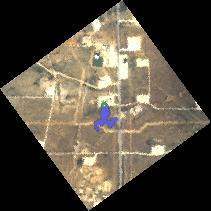

In [6]:
real_img[:,:,0]=img[:,:,0]
real_img[:,:,1]=img[:,:,1]
real_img[:,:,2]=img[:,:,2]
imshow(np.uint8(real_img))

In [10]:
red=img[:,:,0]
green=img[:,:,1]
blue=img[:,:,2]

In [11]:
# b=np.where(blue > 220, blue, 0)
# b=np.where(b ==0, b, 255)


In [12]:
# imshow(b)

In [13]:
# # g=np.where(green > 220, green, 0)
# g=np.where(g ==0, g, 255)
# imshow(g)

In [14]:
# r=np.where(red > 220, red, 0)
# r=np.where(r ==0, r, 255)

# imshow(r)

In [15]:
# real_img[:,:,0]=r
# real_img[:,:,1]=g
# real_img[:,:,2]=b
# imshow(np.uint8(real_img))

In [16]:
# imshow(blue>220)

In [17]:
# imshow(green<220)

In [18]:
# np.uint8(blue>220)

In [19]:
# np.uint8(green<220)

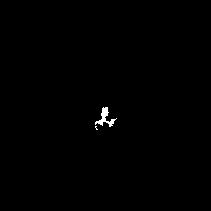

In [20]:
only_blue_carbon=np.uint8(blue>220)*np.uint8(green<120)*np.uint8(red<120)*255
imshow(only_blue_carbon)

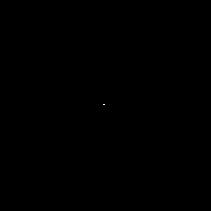

In [21]:
only_green_carbon=np.uint8(blue<120)*np.uint8(green>220)*np.uint8(red<120)*255
imshow(only_green_carbon)

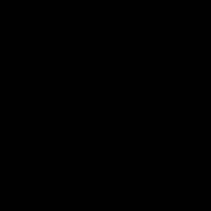

In [22]:
only_red_carbon=np.uint8(blue<120)*np.uint8(green<120)*np.uint8(red>220)*255
imshow(only_red_carbon)

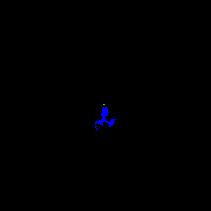

In [23]:
real_img[:,:,0]=only_red_carbon
real_img[:,:,1]=only_green_carbon
real_img[:,:,2]=only_blue_carbon
imshow(np.uint8(real_img))

In [29]:
def flare_extractor(img):
#     img=imread("ang20190922t192642-A.png")
    x,y,c=img.shape
    real_img=np.zeros((x,y,c))
    red=img[:,:,0]
    green=img[:,:,1]
    blue=img[:,:,2]
    only_blue_carbon=np.uint8(blue>220)*np.uint8(green<120)*np.uint8(red<120)
    only_blue_carbon_sum=np.sum(only_blue_carbon)
#     imshow(only_blue_carbon)
    only_green_carbon=np.uint8(blue<150)*np.uint8(green>150)*np.uint8(red<150)
#     imshow(only_green_carbon)
    only_green_carbon_sum=np.sum(only_green_carbon)
    only_red_carbon=np.uint8(blue<120)*np.uint8(green<120)*np.uint8(red>220)
    only_red_carbon_sum=np.sum(only_red_carbon)
    only_yellow_carbon=np.uint8(blue<120)*np.uint8(green>220)*np.uint8(red>220)*255

#     imshow(only_red_carbon)
    real_img[:,:,0]=only_red_carbon*255
    real_img[:,:,1]=only_green_carbon*255
    real_img[:,:,2]=only_blue_carbon*255
    # real_img[:,:,0]=only_red_carbon+only_yellow_carbon
    # real_img[:,:,0]=only_green_carbon+only_yellow_carbon
    out=np.uint8(real_img)
    imshow(out)
    return out,only_red_carbon_sum, only_green_carbon_sum, only_blue_carbon_sum

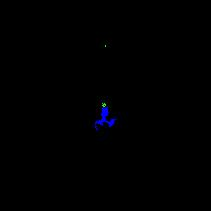

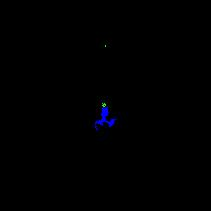

(0, 12, 155)

In [30]:
imshow(img)
img,r,g,b=flare_extractor(img)
r,g,b

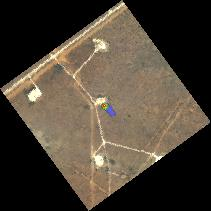

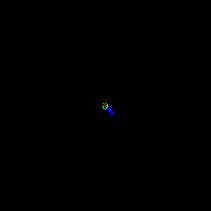

6

In [32]:
img2=imread("ang20190922t192642-B.png")
imshow(img2)
img,r,g,b=flare_extractor(img2)
r

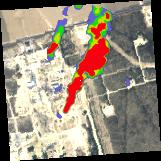

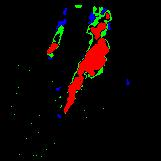

(3909963, 3611099, 3199567)

In [56]:
img2=imread("images/processing-87.png")
imshow(img2)
flare_extractor(img2)
img2[:,:,0].sum(),img2[:,:,1].sum(),img2[:,:,2].sum()